In [0]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Importing the dataset
boston = datasets.load_boston()
# The information Boston is organized as a dictionary
# In order to view their information we call the keys
print(boston.keys())
# The dimensions of our dataset
print(boston.data.shape)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)


In [4]:
# The columns are stored in 'feature_names'
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [0]:
# Our independent values are stored in 'RM'(rooms)
x = boston.data[:,np.newaxis,5]

In [0]:
# Our dependent value is stored in target (price)
y = boston.target

Text(0.5, 1.0, 'Number of rooms vs House Price')

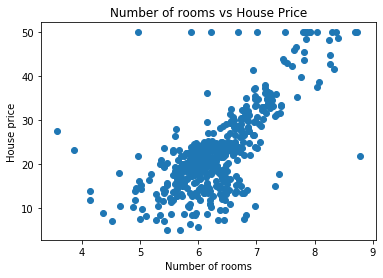

In [9]:
# Ploting to see the relation
plt.scatter(x,y)
plt.xlabel('Number of rooms')
plt.ylabel('House price')
plt.title('Number of rooms vs House Price')

In [0]:
  # Dividing the dataset in train and test
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [0]:
# Calling the algorithm
# n_estimators = 300 means that we are going to use 300 trees
# max_depth = 8 means that the depth of each tree is 8
# The tree is going to have 8 leafs
rfr = RandomForestRegressor(n_estimators=300, max_depth=8 )

In [13]:
# Training the model
rfr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
# Predicting the values of y
y_pred = rfr.predict(x_test)

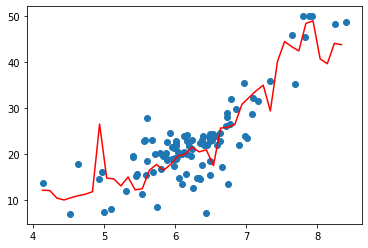

In [17]:
# Plotting the results
# First we use arrange to space the data
# in the interval of max and min of the test data
# the space for that is 0.1
# Finally, we reshape the data in order to plot it
X_grid = np.arange(min(x_test),max(x_test),0.1)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(x_test, y_test)
plt.plot(X_grid, rfr.predict(X_grid), color = 'red')
plt.show()

In [18]:
# Presenting the model in a mathematical form
R = rfr.score(x_train,y_train)
print('R ²   = ',R)

R ²   =  0.8135956959961101


The model has a presicion over 80 %, it means that the model has a very good presicion

In [19]:
# A simple prediction for 1 value when x = 5
x1 = 5
x_new = np.array(x1).reshape(1,-1)
j_p = rfr.predict(x_new)
j_p

array([17.15002313])